In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from datetime import timedelta, date

In [2]:
df = pd.read_csv('./Data/Storico/clean_dataset.csv', index_col= 0)

In [4]:
ita = df[df['country_code'] == 'IT']

In [5]:
set(ita['provincia'])

{'Alessandria',
 'Ancona',
 'Aosta',
 'Arezzo',
 'Ascoli Piceno',
 'Asti',
 'Avellino',
 'Bari',
 'Barletta-Andria-Trani',
 'Belluno',
 'Benevento',
 'Bergamo',
 'Biella',
 'Bologna',
 'Bolzano',
 'Brescia',
 'Brindisi',
 'Campobasso',
 'Caserta',
 'Catania',
 'Catanzaro',
 'Chieti',
 'Como',
 'Cosenza',
 'Cremona',
 'Crotone',
 'Cuneo',
 'Fermo',
 'Ferrara',
 'Firenze',
 'Foggia',
 'Forli-Cesena',
 'Frosinone',
 'Genova',
 'Gorizia',
 'Grosseto',
 'Imperia',
 "L'Aquila",
 'La Spezia',
 'Latina',
 'Lecce',
 'Lecco',
 'Livorno',
 'Lodi',
 'Lucca',
 'Macerata',
 'Mantova',
 'Massa-Carrara',
 'Matera',
 'Milano',
 'Modena',
 'Monza-Brianza',
 'Napoli',
 'Novara',
 'Padova',
 'Palermo',
 'Parma',
 'Pavia',
 'Perugia',
 'Pesaro e Urbino',
 'Pescara',
 'Piacenza',
 'Pisa',
 'Pistoia',
 'Pordenone',
 'Potenza',
 'Prato',
 'Ragusa',
 'Ravenna',
 'Reggio Calabria',
 'Reggio Emilia',
 'Rieti',
 'Rimini',
 'Roma',
 'Rovigo',
 'Salerno',
 'Savona',
 'Siena',
 'Siracusa',
 'Sondrio',
 'Taranto',
 '

In [297]:
# prova dentro stessa regione: non sono simili
puglia = ita[ita['regione'] == 'Puglia']
set(puglia['provincia'])
# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

puglia = puglia.groupby(['regione','provincia','dep_day']).agg(f).reset_index()
for p in puglia.provincia.unique():
    sub = puglia[puglia.provincia == p]
    x = sub.dep_day
    y = sub.seatsleft + sub.fullseats
    t = zip(x,y)
    x_def = []
    y_def = []
    for d in daterange(date(2017, 1, 1), date(2017, 3, 31)):
        x_def.append(d)
        c = [elem for elem in t if elem[0] == str(d)]
        if c:
            y_def.append(c[0][1])
        else:
            y_def.append(0)
    plt.plot(x_def, y_def)
plt.show()

In [7]:
ita[ita['provincia'] == 'Undefined']
print ita.shape
ita = ita[ita.provincia != 'Undefined']
print ita.shape

(7783, 13)
(7782, 13)


In [14]:
# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

prov = ita.groupby(['regione','provincia','dep_day']).agg(f).reset_index()

prov.head()

,regione,provincia,dep_day,distance,seatsleft,recommended_price,arr_lat,fullseats,arr_long
0,Abruzzo,Chieti,2017-01-09,589.0,2,32.0,42.347886,0,14.163585
1,Abruzzo,Chieti,2017-01-17,591.0,2,32.0,42.347886,0,14.163585
2,Abruzzo,Chieti,2017-01-27,590.0,5,32.0,42.366424,1,14.154416
3,Abruzzo,Chieti,2017-02-01,591.0,3,32.0,42.347882,0,14.163603
4,Abruzzo,Chieti,2017-02-05,651.0,2,35.0,42.104559,0,14.705871


In [15]:
prov['totseats'] = prov.seatsleft + prov.fullseats

In [179]:
pescara = prov.loc[prov.provincia == 'Pescara', ['dep_day','totseats']].reset_index(drop=True)

In [180]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2017, 1, 1)
end_date = date(2017, 3, 31)

for single_date in daterange(start_date, end_date):
    if str(single_date) not in pescara.dep_day.unique():
        line = pd.DataFrame({'dep_day': [single_date], 'totseats': [0]})
        pescara = pd.concat([pescara, line])

In [181]:
pescara.dep_day = pd.to_datetime(pescara.dep_day)

In [182]:
pescara = pescara.sort_values(by = 'dep_day').reset_index(drop=True)

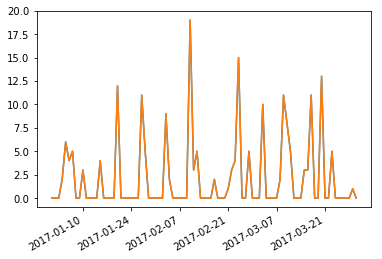

In [111]:
plt.plot(pescara.dep_day, pescara.totseats)
plt.gca().plot_date(pescara.dep_day, pescara.totseats, '-')
plt.gcf().autofmt_xdate()

plt.show()

In [112]:
pescara.dtypes

dep_day     datetime64[ns]
totseats             int64
dtype: object

In [183]:
ts = pescara.set_index('dep_day')

ts.totseats = ts.totseats.astype(float)

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

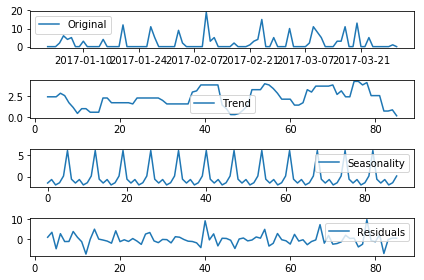

In [145]:
plt.show()

In [233]:
ts_season = seasonal
ts_trend = trend
ts_res = residual

ts_stat = trend + residual
ts_stat = ts_stat[np.logical_not(np.isnan(ts_stat))]
ts_res = ts_res[np.logical_not(np.isnan(ts_res))]

In [228]:
print len(ts_season)
print len(ts_stat)

89
83


In [255]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version


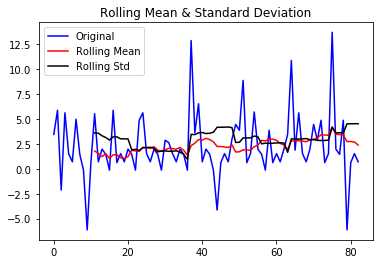

Results of Dickey-Fuller Test:
Test Statistic                -9.011021e+00
p-value                        6.125573e-15
#Lags Used                     0.000000e+00
Number of Observations Used    8.200000e+01
Critical Value (5%)           -2.897490e+00
Critical Value (1%)           -3.512738e+00
Critical Value (10%)          -2.585949e+00
dtype: float64


In [256]:
test_stationarity(ts_stat)

In [281]:
ts_res = ts_diff

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_res, nlags=20)
lag_pacf = pacf(ts_res, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_res)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_res)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

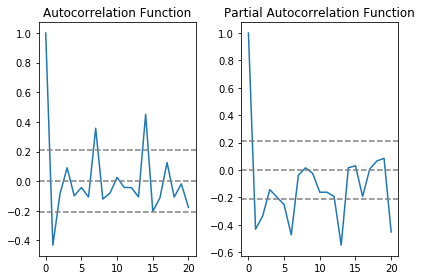

In [282]:
plt.show()

In [294]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order=(4, 1, 5))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

/opt/conda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


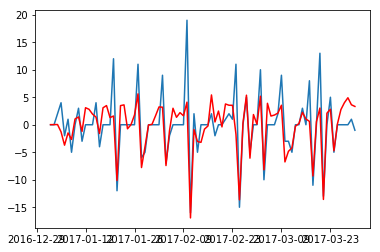

In [295]:
plt.show()